Minor 3DMiB – Foundation Mathematics & Statistics in Python

In [ ]:
#Data preparation (question 0) 

import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/Patrick0481/Foundation-Mathematics-Statistics/refs/heads/main/1654308.csv')
data.head() 

# Drop rows with missing batch_id
df = data.dropna(subset=["batch_id"])

# Impute missing numeric columns with median
df["baking_time"].fillna(df["baking_time"].median(), inplace=True)
df["decoration_time"].fillna(df["decoration_time"].median(), inplace=True)
df["additional_cooling_time"].fillna(df["additional_cooling_time"].median(), inplace=True)

df["decoration_type"].fillna(df["decoration_type"].mode()[0], inplace=True)

# Verify there are no missing values left
print(df.isna().sum())

# Check the shape after cleaning
print("Shape after cleaning:", df.shape)


batch_id                   0
production_line            0
weight                     0
baking_time                0
cooling_type               0
cooling_time               0
decoration                 0
decoration_type            0
decoration_time            0
additional_cooling_time    0
dtype: int64
Shape after cleaning: (1561, 10)


C:\Users\patri\AppData\Local\Temp\ipykernel_22268\3634963448.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["baking_time"].fillna(df["baking_time"].median(), inplace=True)
C:\Users\patri\AppData\Local\Temp\ipykernel_22268\3634963448.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["baking_time"].fillna(df["baking_time"].median(

In [ ]:
# Question 1a
# Descriptive statistics for production phases (question 1)
production_phases = ['baking_time', 'cooling_time', 'decoration_time']
descriptive_stats = df[production_phases].describe().T

# Calculate Skewness and Kurtosis for distribution analysis
descriptive_stats['Skewness'] = df[production_phases].skew()
descriptive_stats['Kurtosis'] = df[production_phases].kurt()

print(descriptive_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Skewness', 'Kurtosis']].round(2))

                  count   mean   std  min   25%   50%   75%   max  Skewness  \
baking_time      1561.0  11.01  1.22  7.0  10.2  11.0  11.8  15.2      0.07   
cooling_time     1561.0  10.91  4.10  5.0   7.4   9.5  14.8  21.4      0.28   
decoration_time  1561.0   4.03  1.46  1.2   3.4   4.0   4.5   8.5      0.45   

                 Kurtosis  
baking_time         -0.01  
cooling_time        -1.30  
decoration_time      0.14  


In [ ]:
# Question 1b
# Group the data by cooling type
cooling_variability = df.groupby('cooling_type')['cooling_time'].agg(['mean', 'std']).copy()

# Calculate the Coefficient of Variation (CV) for each group
cooling_variability['CV (%)'] = cooling_variability.apply(
    lambda row: (row['std'] / row['mean']) * 100 if row['mean'] not in (0, None, np.nan) else np.nan,
    axis=1
)

print(cooling_variability.round(2))

# Compare CVs if both groups exist
cv_rack = cooling_variability.loc['rack', 'CV (%)'] if 'rack' in cooling_variability.index else np.nan
cv_conveyor = cooling_variability.loc['conveyor', 'CV (%)'] if 'conveyor' in cooling_variability.index else np.nan

if pd.notna(cv_rack) and pd.notna(cv_conveyor):
    if cv_rack > cv_conveyor:
        conclusion_variability = "Rack cooling has higher variability (CV)."
    elif cv_conveyor > cv_rack:
        conclusion_variability = "Conveyor cooling has higher variability (CV)."
    else:
        conclusion_variability = "Variability (CV) is approximately equal."
else:
    conclusion_variability = "Insufficient data to compare variability."

print(f"\nConclusion on Variability: {conclusion_variability}")

               mean   std  CV (%)
cooling_type                     
conveyor       7.50  1.44   19.22
rack          14.99  1.99   13.26

Conclusion on Variability: Conveyor cooling has higher variability (CV).


In [ ]:
# Question 1c
import numpy as np
from scipy.integrate import quad

# Production rate C(t)
def C(t):
    return 150 * np.abs(np.sin(np.pi * t))

# Integrate from t = 0 to 3.5 hours
total_pretzels, _ = quad(C, 0, 3.5)

print("Total pretzels produced in first 3.5 hours:", total_pretzels)

Total pretzels produced in first 3.5 hours: 334.22538049298004


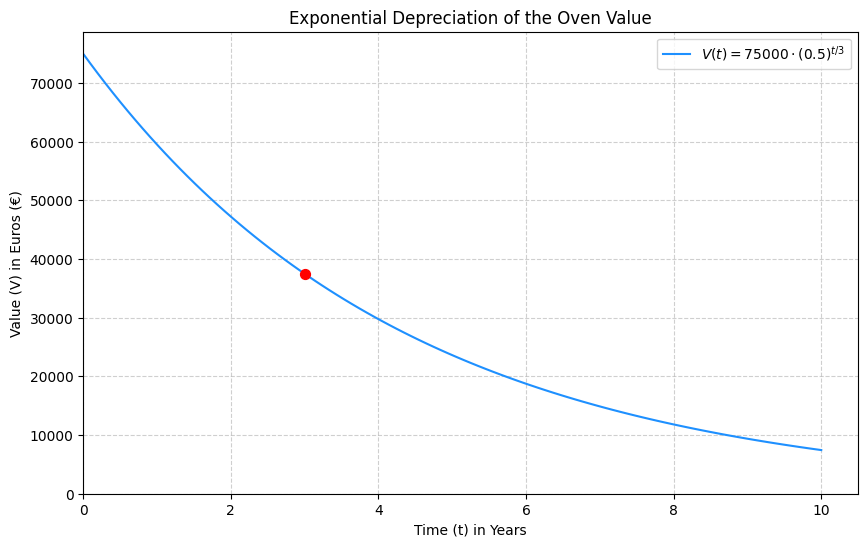

Oven value after 3 years: €37500.00
Oven value after 4 years: €29763.77


In [ ]:
# Question 2a
import matplotlib.pyplot as plt

V0 = 75000  # Initial value in Euros
b_factor = 0.5  # The value is halved after 3 years
time_period = 3  # Time in years for the halving

# 2. Define the exponential depreciation function V(t)
def V(t):
    """Calculates the oven value V(t) after t years."""
    # Model: V(t) = V0 * (0.5)^(t / 3)
    return V0 * (b_factor)**(t / time_period)

# 3. Generate time points (t) from 0 to 10 years for the plot
t = np.linspace(0, 10, 100)

# 4. Calculate the corresponding value (V) for each time point
value = V(t)

# 5. Visualization Setup
plt.figure(figsize=(10, 6))

# Plot the depreciation curve
plt.plot(t, value, 
         label=r'$V(t) = 75000 \cdot (0.5)^{t/3}$', 
         color='dodgerblue')


plt.scatter([3], [V(3)], color='red', s=50, zorder=5)

# Add labels, title, and grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Time (t) in Years')
plt.ylabel('Value (V) in Euros (€)')
plt.title('Exponential Depreciation of the Oven Value')
plt.legend()
plt.ylim(0, V0 * 1.05) # Set y-limit slightly above initial value
plt.xlim(0) # Start x-axis at 0

# Display the plot
plt.show()
print("Oven value after 3 years: €{:.2f}".format(V(3)))
print("Oven value after 4 years: €{:.2f}".format(V(4)))

In [ ]:
# Question 2b
import math

t = 4  # Year 4
V0_div_3 = 25000 # 75000 / 3

# Calculate the constant part of the derivative: 25000 * ln(0.5)
constant_factor = V0_div_3 * math.log(0.5)

# Calculate the exponential part at t=4: (0.5)**(4/3)
exponential_part = (0.5)**(t / 3)

# Calculate the rate of devaluation V'(4)
rate_of_devaluation = constant_factor * exponential_part

# The negative sign indicates depreciation (loss of value).
# The magnitude is the rate of devaluation in Euros per year.
rate_magnitude = abs(rate_of_devaluation)

print(f"Magnitude of the rate of devaluation in year 4: €{rate_magnitude:,.2f} per year")
print("Oven value after 4 years: €{:.2f}".format(V(4)))

Magnitude of the rate of devaluation in year 4: €6,876.89 per year
Oven value after 4 years: €29763.77


In [ ]:
# Question 2c
fraction_of_value = 0.2 # 1/5th of the original value

# Calculate t
t = 3 * (math.log(fraction_of_value) / math.log(0.5))

# Print the result, rounded to two decimal places
print(f"Time (t) required for the oven to be worth 1/5th of V0: {t:.2f} years")

Time (t) required for the oven to be worth 1/5th of V0: 6.97 years


In [ ]:
# Question 3a 
# Define the underweight threshold
UNDERWEIGHT_THRESHOLD = 500

# Calculate the underweight status for each batch
df['is_underweight'] = df['weight'] < UNDERWEIGHT_THRESHOLD

#Group by production line and calculate summary statistics
production_summary = df.groupby('production_line').agg(
    total_batches=('batch_id', 'count'),
    underweight_batches=('is_underweight', 'sum')
)

# Calculate the probability of being underweight
production_summary['probability_underweight'] = \
    production_summary['underweight_batches'] / production_summary['total_batches']

# Display the results
print("--- Underweight Probability Analysis ---")
print(production_summary[['underweight_batches', 'total_batches', 'probability_underweight']])

--- Underweight Probability Analysis ---
                 underweight_batches  total_batches  probability_underweight
production_line                                                             
1                                 12            779                 0.015404
2                                 52            782                 0.066496


C:\Users\patri\AppData\Local\Temp\ipykernel_22268\8773871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_underweight'] = df['weight'] < UNDERWEIGHT_THRESHOLD


In [31]:
# Question 3b

from scipy.stats import binom

total_underweight = 67
total_batches = 1561

p = total_underweight / total_batches 

n = 80  
k = 8  

# Calculate the probability P(X <= 8) using the Binomial CDF 
probability = binom.cdf(k, n, p)

print(f"Overall probability of an underweight batch (p): {p:.4f}")
print(f"Probability P(X <= 8) for n={n} batches: {probability:.4f}")

Overall probability of an underweight batch (p): 0.0429
Probability P(X <= 8) for n=80 batches: 0.9927


In [32]:
# Question 3c

import math
from scipy.stats import norm

# Parameters from the data
total_underweight = 67
total_batches = 1561

# Sample proportion (observed chance)
p_hat = total_underweight / total_batches

# Hypothesized proportion (5% or 0.05)
p0 = 0.05

# Sample size
n = total_batches

# Calculate the standard error (SE) under the null hypothesis (p=p0)
SE = math.sqrt((p0 * (1 - p0)) / n)

# Calculate the Z-score for the test statistic
Z = (p_hat - p0) / SE

# Calculate the P-value (left-tailed test)
# P-value = P(Z < calculated Z-score)
p_value = norm.cdf(Z)

print(f"Observed Proportion (p_hat): {p_hat:.4f}")
print(f"Hypothesized Proportion (p0): {p0:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Z-score: {Z:.4f}")
print(f"P-value (P(Z < Z-score)): {p_value:.4f}")

Observed Proportion (p_hat): 0.0429
Hypothesized Proportion (p0): 0.0500
Standard Error (SE): 0.0055
Z-score: -1.2833
P-value (P(Z < Z-score)): 0.0997


In [35]:
# Question 4a

# Define the decoration type for glazed batches
DECORATION_TYPE = 'glace'
glazed_batches = df[df['decoration_type'] == DECORATION_TYPE].copy()

# Filter out missing values in the additional_cooling_time column
glazed_batches_clean = glazed_batches.dropna(subset=['additional_cooling_time']).copy()
glazed_batches_clean['additional_cooling_time'] = pd.to_numeric(glazed_batches_clean['additional_cooling_time'])

# Calculate total relevant batches
total_glazed_batches = len(glazed_batches_clean)

# Count batches taking more than 1.5 hours (90 minutes)
TIME_THRESHOLD_MINUTES = 90
long_cooling_batches = glazed_batches_clean[
    glazed_batches_clean['additional_cooling_time'] > TIME_THRESHOLD_MINUTES
]
count_long_cooling = len(long_cooling_batches)

# Calculate the probability
if total_glazed_batches > 0:
    probability = count_long_cooling / total_glazed_batches
else:
    probability = 0

print(f"Total glazed batches with cooling time data: {total_glazed_batches}")
print(f"Glazed batches taking more than 1.5 hours (90 min): {count_long_cooling}")
print(f"Probability (P > 1.5 hours): {probability}")


Total glazed batches with cooling time data: 358
Glazed batches taking more than 1.5 hours (90 min): 138
Probability (P > 1.5 hours): 0.3854748603351955


In [36]:
# Question 4b

# The top 25% of data points start at the 75th percentile (P75).
q3_time_minutes = np.percentile(glazed_batches_clean['additional_cooling_time'], 75)

# Convert to hours and minutes for clarity in the final answer
q3_hours = math.floor(q3_time_minutes / 60)
q3_minutes_remaining = q3_time_minutes % 60

print(f"75th percentile time (P75) in minutes: {q3_time_minutes}")
print(f"Time in hours and minutes: {q3_hours} hours and {q3_minutes_remaining:.1f} minutes")

75th percentile time (P75) in minutes: 93.975
Time in hours and minutes: 1 hours and 34.0 minutes


In [38]:
# Question 5a

from scipy import stats

# Data cleaning and filtering for cooling analysis
cooling_data = df.dropna(subset=['cooling_time', 'cooling_type']).copy()
cooling_data['cooling_time'] = pd.to_numeric(cooling_data['cooling_time'])

# Separate samples by cooling type
conveyor_times = cooling_data[cooling_data['cooling_type'] == 'conveyor']['cooling_time']
rack_times = cooling_data[cooling_data['cooling_type'] == 'rack']['cooling_time']

# Perform Welch's t-test (two-sample, assuming unequal variances)
t_stat, p_value_two_tailed = stats.ttest_ind(conveyor_times, rack_times, equal_var=False)

# For a one-tailed test (conveyor < rack), if t_stat is negative, the one-tailed P-value is p_value_two_tailed / 2.
if t_stat < 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)


print(f"Mean Conveyor Cooling Time: {conveyor_times.mean():.2f}")
print(f"Mean Rack Cooling Time: {rack_times.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value (Conveyor < Rack): {p_value_one_tailed:.10f}")


Mean Conveyor Cooling Time: 7.50
Mean Rack Cooling Time: 14.99
T-statistic: -83.6319
One-tailed P-value (Conveyor < Rack): 0.0000000000


In [46]:
# Question 5b

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data cleaning and filtering for decoration analysis
decoration_data = df[df['decoration'] == 'yes'].copy()
decoration_data = decoration_data.dropna(subset=['decoration_time', 'decoration_type']).copy()
decoration_data['decoration_time'] = pd.to_numeric(decoration_data['decoration_time'])

# Filter only for the main decoration types mentioned in the data preview
decoration_types = ['glace', 'sprinkles', 'fondant']
filtered_decoration_data = decoration_data[decoration_data['decoration_type'].isin(decoration_types)]

# Separate samples for ANOVA
glace_times = filtered_decoration_data[filtered_decoration_data['decoration_type'] == 'glace']['decoration_time']
sprinkles_times = filtered_decoration_data[filtered_decoration_data['decoration_type'] == 'sprinkles']['decoration_time']
fondant_times = filtered_decoration_data[filtered_decoration_data['decoration_type'] == 'fondant']['decoration_time']

# 1. Perform One-Way ANOVA
f_stat, anova_p_value = stats.f_oneway(glace_times, sprinkles_times, fondant_times)

print(f"Mean Glace Decoration Time: {glace_times.mean():.2f}")
print(f"Mean Sprinkles Decoration Time: {sprinkles_times.mean():.2f}")
print(f"Mean Fondant Decoration Time: {fondant_times.mean():.2f}")
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA P-value: {anova_p_value:.10f}")

# 2. Perform Post-hoc Tukey's HSD test if ANOVA is significant (e.g., P-value < 0.05)
if anova_p_value < 0.05:
    print("\nANOVA is significant (P < 0.05). Running Tukey's HSD test:")
    
    # Run Tukey's HSD
    tukey_results = pairwise_tukeyhsd(
        endog=filtered_decoration_data['decoration_time'],
        groups=filtered_decoration_data['decoration_type'],
        alpha=0.05
    )
    print(tukey_results)
else:
    print("\nANOVA is not significant (P >= 0.05). No further post-hoc test needed.")

Mean Glace Decoration Time: 3.95
Mean Sprinkles Decoration Time: 2.01
Mean Fondant Decoration Time: 6.07
ANOVA F-statistic: 3348.7850
ANOVA P-value: 0.0000000000

ANOVA is significant (P < 0.05). Running Tukey's HSD test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
fondant     glace  -2.1151   0.0 -2.2299 -2.0002   True
fondant sprinkles  -4.0602   0.0 -4.1768 -3.9437   True
  glace sprinkles  -1.9452   0.0 -2.0617 -1.8286   True
-------------------------------------------------------


In [47]:
# Question 6a

from scipy.stats import binom

# Parameters for the Binomial Distribution
n = 400   
p = 0.98  
# We want to find the probability that 395 or more batches pass: P(X >= 395)
k_max_fail = 394

# Calculate the Cumulative Distribution Function (CDF) for P(X <= 394)
prob_less_than_395 = binom.cdf(k_max_fail, n, p)

# Calculate the final probability P(X >= 395)
prob_395_or_more = 1 - prob_less_than_395

print(f"P(X <= 394): {prob_less_than_395}")
print(f"P(X >= 395): {prob_395_or_more}")

P(X <= 394): 0.8115343834308092
P(X >= 395): 0.1884656165691908


In [48]:
# Question 6b

# Parameters for the Binomial Distribution 
n = 100   
p_hypothesized = 0.98  

# We found X=95 passes. We want to find the probability of observing 95 or fewer passes,
k_observed = 95

# Calculate the Cumulative Distribution Function (CDF) for P(X <= 95)
prob_95_or_fewer = binom.cdf(k_observed, n, p_hypothesized)

print(f"P(X <= 95 | n=100, p=0.98): {prob_95_or_fewer}")

P(X <= 95 | n=100, p=0.98): 0.05083044536950054
